In [ ]:
! pip install yfinance
! pip install yahoo-finance

In [2]:
#import packages
import yahoo_finance as yahoo
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import plotly.express as px
from datetime import datetime, timedelta

#define start and end dates
start_date = datetime.today() - timedelta(days=7)
end_date = datetime.today()

In [ ]:
# Read and print the stock tickers that make up S&P500
tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
print(tickers.head())
data_list= tickers['Symbol']
data = pd.DataFrame(columns=tickers['Symbol'])

# Get the data for this tickers from yahoo finance
for ticker in data_list:
    data[ticker] = yf.download(ticker, start_date, end_date)['Adj Close']

In [ ]:
#calc the daily returns and cumulative returns
daily_returns = data.pct_change()
daily_returns_avg = daily_returns.mean()
cumul_returns = (1 + daily_returns).cumprod()-1
cumul_returns = cumul_returns.reset_index()
total_period_return = cumul_returns.iloc[:,1:].tail(1)
total_period_return = total_period_return*100
total_period_return = total_period_return.transpose()
total_period_return.columns = ['Total_Return']
#print(total_period_return)

In [10]:
#filter total return for buys
#buy threshold will be cumulative return 5% or greater, top 10
buy_df = total_period_return[total_period_return['Total_Return']>=5].sort_values('Total_Return',ascending=False).head(10)
display('These stocks are rated a buy',buy_df)

'These stocks are rated a buy'

,Total_Return
Symbol,
AXON,22.971660
FTNT,20.069929
K,19.822723
KVUE,14.063344
UBER,13.094070
GDDY,10.911528
CBOE,9.921934
FICO,8.750755
CLX,7.596543


In [11]:
#filter total return for sells
#sell threshold will be cumulative return of -8% or greater, bottom 10
sell_df = total_period_return[total_period_return['Total_Return']<=-8].sort_values('Total_Return',ascending=True).head(10)
display('These stocks are rated a sell', sell_df)

'These stocks are rated a sell'

,Total_Return
Symbol,
INTC,-29.018997
SMCI,-24.143162
CRL,-16.846485
WBD,-16.229118
ABNB,-15.138054
MCK,-12.967940
MNST,-12.397825
ALB,-12.171296
PRU,-11.241731


In [ ]:
#download market data for same time frame and compare the buys to the market
# Read and print the stock tickers that make up S&P500
tickers_mkt = pd.read_html(
    'https://finance.yahoo.com/world-indices/')[0]
print(tickers_mkt.head())
mkt_list= tickers_mkt['Symbol']
mkt_data = pd.DataFrame(columns=tickers_mkt['Symbol'])

# Get the data for this tickers from yahoo finance
for ticker in mkt_list:
    mkt_data[ticker] = yf.download(ticker, start_date, end_date)['Adj Close']

In [ ]:
#finding the top 5 markets returns from yahoo's market indexes
market_daily_return = mkt_data.pct_change()
market_daily_return_avg = market_daily_return.mean()
cumul_return_mkt = (1 + market_daily_return).cumprod()-1
cumul_return_mkt = cumul_return_mkt.reset_index()
total_period_return_mkt = cumul_return_mkt.iloc[:,1:].tail(1)
total_period_return_mkt = total_period_return_mkt*100
total_period_return_mkt = total_period_return_mkt.transpose()
total_period_return_mkt = total_period_return_mkt.dropna()
total_period_return_mkt.columns = ['Total_Return']
total_period_return_mkt_top_five = total_period_return_mkt.sort_values('Total_Return',ascending=False).head(5)
#print(total_period_return_mkt_top_five)

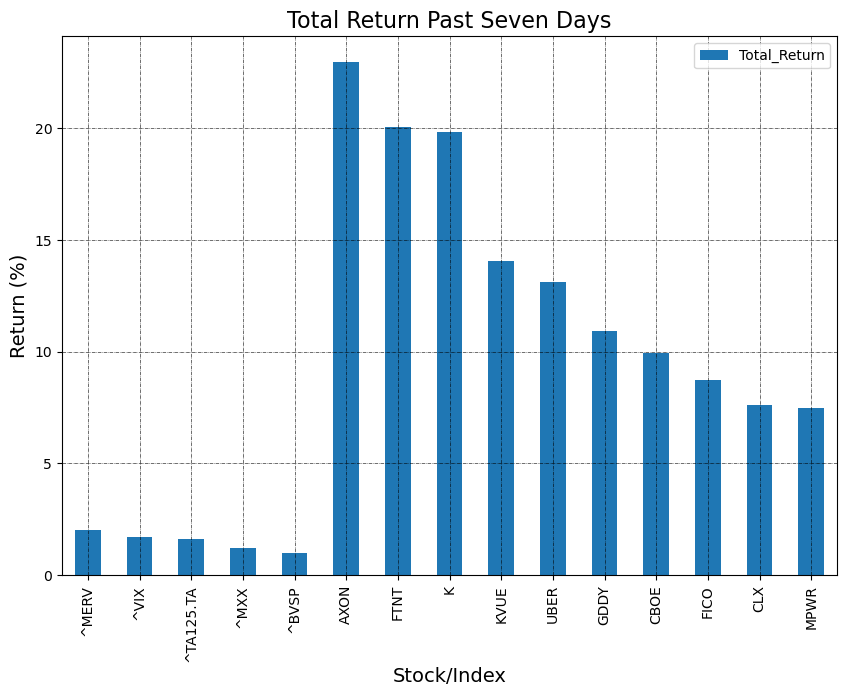

In [14]:
#plot the top five indexes versus the buy stocks, the total return
combined_data = pd.concat([total_period_return_mkt_top_five,buy_df])
#plot annualized returns for funds and market to see which ones outperform the market
combined_data.plot.bar(figsize=(10,7))
plt.legend
plt.title('Total Return Past Seven Days',fontsize = 16)
plt.ylabel('Return (%)',fontsize=14)
plt.xlabel('Stock/Index',fontsize=14)
plt.grid(which='major',color='k',linestyle='-.',linewidth=0.4)
plt.show()